## Activity 1: Estimando um Intervalo de Confiança para a Média

Obtenha um conjunto de dados amostrais (por exemplo, pesos de indivíduos, notas de testes, etc.).

Calcule o intervalo de confiança de 95% para a média da população seguindo os passos:
Calcular a média e o desvio padrão da amostra.
Usar a fórmula para intervalo de confiança ou a biblioteca scipy.stats.
Desafio: Repetir o processo para diferentes níveis de confiança (por exemplo, 90%, 99%) e comparar os resultados.

Visualizar os intervalos de confiança em um gráfico usando matplotlib para mostrar a variabilidade.


In [27]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import math

In [28]:
dataset = pd.read_csv("../dados_poscomp_completo.csv")

In [29]:
dataset.dropna(inplace=True)

In [30]:
dataset['total'] = dataset['matematica'] + dataset['fund_computacao'] + dataset['tec_computacao']

In [31]:
dataset = dataset.query("presença != 'n'")

In [32]:
sample_size = len(dataset)
sample_size

11949

In [33]:
total_score = dataset['total'].values

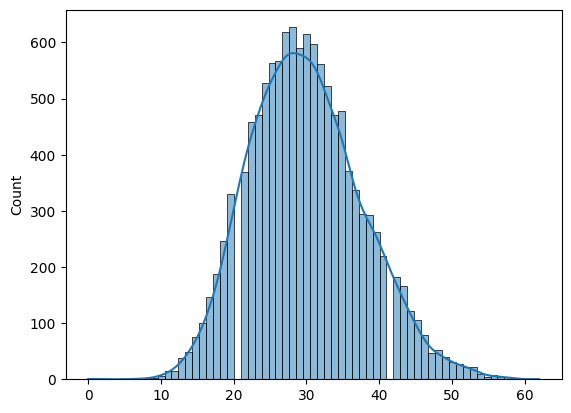

In [34]:
sns.histplot(total_score, kde=True);

In [35]:
# Realizar a média
mean = np.mean(total_score)
mean

np.float64(29.938237509415014)

In [36]:
standard_deviation = np.std(total_score)
standard_deviation

np.float64(7.697946678706096)

In [37]:
stats.sem(total_score)

np.float64(0.07042507068890201)

In [38]:
standard_deviation / math.sqrt(sample_size - 1)

np.float64(0.07042507068890201)

### Confiança com 95%

In [39]:
intervals = norm.interval(0.95, mean, stats.sem(total_score))
intervals

(np.float64(29.80020690725608), np.float64(30.07626811157395))

In [40]:
margem_erro = mean - intervals[0]
margem_erro

np.float64(0.1380306021589348)

### Com diferentes niveis

#### 90%

In [41]:
intervals_90 = norm.interval(0.90, mean, stats.sem(total_score))
intervals_90

(np.float64(29.82239857646406), np.float64(30.054076442365968))

In [42]:
margem_erro = mean - intervals_90[0]
margem_erro

np.float64(0.11583893295095393)

#### 99%

In [43]:
intervals_99 = norm.interval(0.99, mean, stats.sem(total_score))
intervals_99

(np.float64(29.75683454863004), np.float64(30.11964047019999))

In [44]:
margem_erro = mean - intervals_99[0]
margem_erro

np.float64(0.18140296078497542)

#### 85%

In [45]:
intervals_85 = norm.interval(0.85, mean, stats.sem(total_score))
intervals_85

(np.float64(29.836858403815274), np.float64(30.039616615014754))

In [46]:
margem_erro = mean - intervals_85[0]
margem_erro

np.float64(0.10137910559974017)

#### Agora plotar os intervalos de confiança

In [51]:
# Calculando a média e os intervalos de confiança
mean = np.mean(total_score)
confidence_levels = [0.80, 0.85, 0.90, 0.95, 0.99]  # Diferentes níveis de confiança
intervals = [
    norm.interval(conf, loc=mean, scale=sem(total_score)) 
    for conf in confidence_levels
]

In [52]:
# Criar o dataframe.
# Criando o DataFrame
df = pd.DataFrame({
    'nivel_confianca': [f'{int(conf * 100)}%' for conf in confidence_levels],
    'IC_inferior': [ci[0] for ci in intervals],
    'media': mean,
    'IC_superior': [ci[1] for ci in intervals]
})

In [53]:
df

,nivel_confianca,IC_inferior,media,IC_superior
0,80%,29.847984,29.938238,30.028491
1,85%,29.836858,29.938238,30.039617
2,90%,29.822399,29.938238,30.054076
3,95%,29.800207,29.938238,30.076268
4,99%,29.756835,29.938238,30.119640


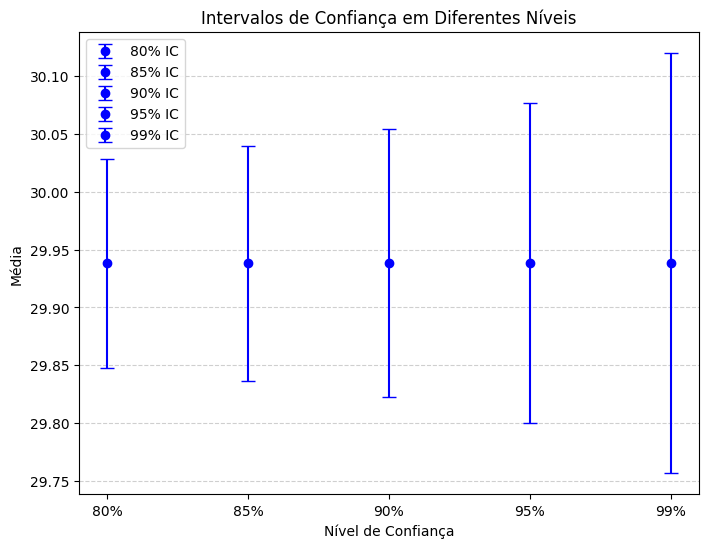

In [54]:
plt.figure(figsize=(8, 6))
for i, row in df.iterrows():
    plt.errorbar(
        x=row['nivel_confianca'], y=row['media'], 
        yerr=[[row['media'] - row['IC_inferior']], [row['IC_superior'] - row['media']]], 
        fmt='o', capsize=5, label=f"{row['nivel_confianca']} IC", color='blue'
    )

# Configurações do gráfico
plt.title('Intervalos de Confiança em Diferentes Níveis')
plt.ylabel('Média')
plt.xlabel('Nível de Confiança')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

Aqui está a explicação formatada em **Markdown**:

---

# Análise dos Intervalos de Confiança das Notas do POSCOMP (2016–2023)

## **Contexto**
Os dados analisados referem-se às notas dos alunos que realizaram o POSCOMP entre os anos de 2016 e 2023. A análise foi conduzida para determinar a **média das notas** e calcular os **intervalos de confiança (IC)**, visando avaliar a estabilidade das médias e a incerteza associada.

---

## **Resultados**

### **Média das Notas**
- A média geral das notas é **29,938**.
- Essa média é uma **estimativa pontual** da média verdadeira da população (todos os participantes do POSCOMP no período analisado).

### **Intervalos de Confiança**
Os intervalos de confiança calculados para diferentes níveis de confiança foram os seguintes:

| **Nível de Confiança** | **IC Inferior** | **Média** | **IC Superior** | **Amplitude do IC** |
|-------------------------|-----------------|-----------|-----------------|---------------------|
| 90%                    | 29,822          | 29,938    | 30,054          | 0,232              |
| 95%                    | 29,800          | 29,938    | 30,076          | 0,276              |
| 99%                    | 29,757          | 29,938    | 30,120          | 0,363              |

---

## **Interpretação Estatística**

### **O que representam os Intervalos de Confiança?**
- Um **intervalo de confiança** indica a faixa de valores dentro da qual acreditamos, com um certo grau de confiança, que a **média verdadeira das notas** do POSCOMP se encontra.
- **Por exemplo**:
  - Para o intervalo de 95% $(29,800 \leq \mu \leq 30,076)$, há **95% de confiança de que a média verdadeira das notas do POSCOMP esteja dentro desse intervalo**.

### **Relação entre Nível de Confiança e Amplitude**
- À medida que o nível de confiança aumenta, o intervalo de confiança se torna mais **amplo**:
  - **90%**: Maior precisão, mas menor certeza de capturar a média verdadeira.
  - **99%**: Menor precisão (intervalo mais amplo), mas maior certeza de conter a média verdadeira.

### **Interpretação no Contexto do POSCOMP**
1. **Consistência das Notas**:
   - Os intervalos de confiança são **relativamente estreitos**, sugerindo que a média das notas é estável e confiável ao longo dos anos analisados (2016–2023).
   
2. **Importância Educacional**:
   - A análise dos intervalos de confiança ajuda a verificar se as notas médias permanecem consistentes ao longo dos anos.
   - Esses resultados podem ser usados para avaliar:
     - A **qualidade e dificuldade do exame**.
     - **Mudanças no desempenho médio** dos candidatos ao longo do tempo.

3. **Recomendação para Relatórios**:
   - O intervalo de confiança de **95%** é o mais recomendado para relatórios educacionais, pois oferece um bom equilíbrio entre precisão e confiança.

---

## **Conclusão**
- A **média das notas do POSCOMP** entre 2016 e 2023 é **29,938**.
- Os intervalos de confiança mostram que, com **95% de confiança**, a média verdadeira está entre **29,800** e **30,076**.
- Essa análise confirma a **estabilidade das notas médias**, oferecendo uma base confiável para análises futuras e tomadas de decisão educacionais.

---

Se precisar de mais análises ou visualizações adicionais, como segmentação por ano ou gráficos, é só avisar!